In [1]:
import networkx as nx
import pandas as pd
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import celluloid as cld

In [2]:
test = [1,2,3,4,5]

# Ideas
## only "friends" can influence
## only "friendgroup" can influence
## only "population" can influence
## combinations

## only opinions 0/1
## agents can be changeable or unchangeable
## agents can have different influence

In [2]:
class Agent():
    
    def __init__(self, opinion=0, change=True, influence=1):
        
        self.opinion=opinion
        self.change=change    
        self.influence=influence
        self.status=None
        
        self.friends=[]
        self.node_id=None
        
        self.opinion_history = []
        self.next_opinion = False
        
    def node_output(self):
        return (
            self.node_id,
            dict(
                opinion=self.opinion,
                change=self.change,
                influence=self.influence,
                status=self.status
            )          
        )
    
    def tie_output(self):
        tie_list = []
        for friend in self.friends:
            tie_list.append((
                self.node_id,
                friend.node_id
            ))
            
        return tie_list

In [133]:
population = []
for i in range(50):
    op = rand.randint(0,1)
    agent = Agent(op)
    agent.node_id = i
    population.append(agent)
    

In [119]:
for agent in population:
    n_friends = rand.randint(0,5)
    while len(agent.friends) < n_friends:
        fr = rand.choice(population)
        if fr != agent:
            if fr not in agent.friends:
                agent.friends.append(fr)

In [122]:
for tick in range(1):
    
    for agent in population:
        fr_op = []
        for fr in agent.friends:
            fr_op.append(fr.opinion)
        if np.mean(fr_op) >= .5:
            agent.next_opinion = 1
        else:
            agent.next_opinion = 0
        
    for agent in population:
        agent.opinion = agent.next_opinion
        agent.next_opinion = False
        agent.opinion_history.append(agent.opinion)

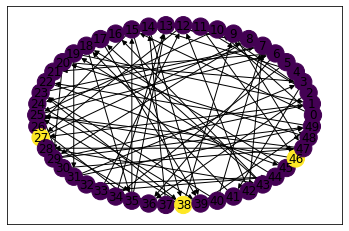

In [153]:
population = []
for i in range(50):
    r = rand.random()
    if r >= .1:
        op = 0
    else:
        op = 1
    agent = Agent(op)
    agent.node_id = i
    population.append(agent)
    
for agent in population:
        n_friends = rand.randint(1,2)
        while len(agent.friends) < n_friends:
            fr = rand.choice(population)
            if fr != agent:
                if fr not in agent.friends:
                    agent.friends.append(fr)

node_list = []
tie_list = []
for agent in population:
    node_list.append(agent.node_output())
    tie_list.extend(agent.tie_output())
    
G = nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(tie_list)

opinion = []
for node in G.nodes:
    opinion.append(G.nodes[node]['opinion'])

fig, axes = plt.subplots()
lay = nx.circular_layout(G)
nx.draw_networkx(G, pos=lay, arrows=True, node_color=opinion, ax=axes)

In [ ]:
fig.set_size_inches(6,6)

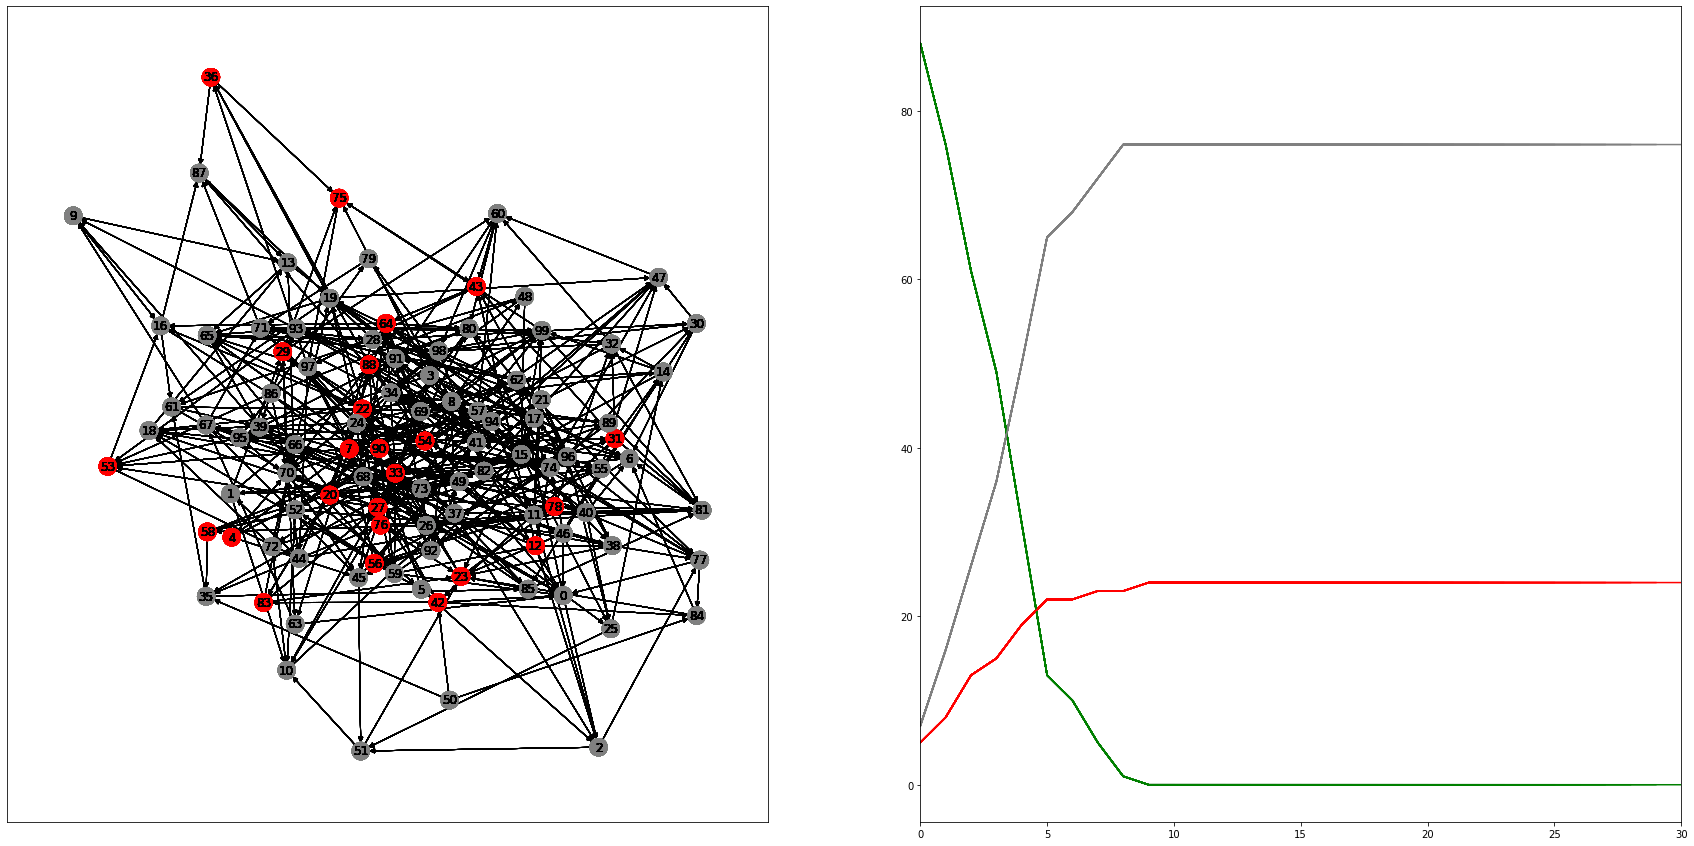

In [6]:
n_ticks = 30
population = []
for i in range(100):
    r = rand.random()
    if r >= .05:
        op = 0
    else:
        op = 1
    status = 'I'
        
    if op == 0:
        r2 = rand.random()
        if r2 >= .05:
            status = 'S'
        else:
            status = 'R'
            
            
    agent = Agent(op)
    agent.node_id = i
    agent.status = status
    population.append(agent)
    
for agent in population:
        n_friends = rand.randint(2,6)
        while len(agent.friends) < n_friends:
            fr = rand.choice(population)
            if fr != agent:
                if fr not in agent.friends:
                    agent.friends.append(fr)

node_list = []
tie_list = []
for agent in population:
    node_list.append(agent.node_output())
    tie_list.extend(agent.tie_output())
    
G = nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(tie_list)

opinion = []
for node in G.nodes:
    s = G.nodes[node]['status']
    c = None
    if s == 'S':
        c = 'green'
    elif s == 'I':
        c = 'red'
    elif s == 'R':
        c = 'grey'
            
    opinion.append(c)
    
lay = nx.spring_layout(G)

fig, axes = plt.subplots(1,2)
fig.set_size_inches(30,15)
axes[1].set(xlim=[0,n_ticks])

camera = cld.Camera(fig)

n_s = []
n_i = []
n_r = []

ns = 0
ni = 0
nr = 0
for agent in population:
    if agent.status == 'S':
        ns+=1
    elif agent.status == 'I':
        ni+=1
    elif agent.status == 'R':
        nr+=1
        
n_s.append(ns)
n_i.append(ni)
n_r.append(nr)

axes[1].plot(n_s, color='green')
axes[1].plot(n_i, color='red')
axes[1].plot(n_r, color='grey')

nx.draw_networkx(G, pos=lay, arrows=True, node_color=opinion, ax=axes[0])
camera.snap()

for tick in range(n_ticks):
    # code for what the agents are doing per tick
    
    #n_1 = 0
    #for agent in population:
    #    n_1 += agent.opinion
    
    #prop = n_1/len(population)
    
    for agent in population:
        #r = rand.random()
        #if r <= prop:
        #    agent.next_opinion = 1
        if agent.status == 'S':
            friend = rand.choice(agent.friends)
            if friend.opinion == 1:
                i_r = rand.random()
                if i_r >= .4:
                    agent.next_opinion = 1
                    agent.status = 'I'
            if friend.opinion == 0:
                if friend.status == 'R':
                    r_r = rand.random()
                    if r_r >= .3:
                        agent.status = 'R'
            
            #for friend in agent.friends:
            #    if friend.opinion == 1:
            #        agent.next_opinion = 1
            #        agent.status = 'I'
    
    ns = 0
    ni = 0
    nr = 0
    for agent in population:
        if agent.status == 'S':
            ns+=1
        elif agent.status == 'I':
            ni+=1
        elif agent.status == 'R':
            nr+=1
            
        if agent.next_opinion:
            agent.opinion = agent.next_opinion
            agent.next_opinion = False
        agent.opinion_history.append(agent.opinion)
    
    n_s.append(ns)
    n_i.append(ni)
    n_r.append(nr)

    # code for adding the network to the animation
    node_list = []
    tie_list = []
    for agent in population:
        node_list.append(agent.node_output())
        tie_list.extend(agent.tie_output())

    G = nx.DiGraph()
    G.add_nodes_from(node_list)
    G.add_edges_from(tie_list)

    opinion = []
    for node in G.nodes:
        s = G.nodes[node]['status']
        c = None
        if s == 'S':
            c = 'green'
        elif s == 'I':
            c = 'red'
        elif s == 'R':
            c = 'grey'
            
        opinion.append(c)
    
    axes[1].plot(n_s, color='green')
    axes[1].plot(n_i, color='red')
    axes[1].plot(n_r, color='grey')
    
    nx.draw_networkx(G, pos=lay, arrows=True, node_color=opinion, ax=axes[0])
    camera.snap()

In [7]:
animation = camera.animate()
animation.save("network.mp4", dpi=300, fps=5)

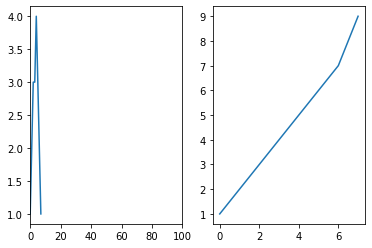

In [212]:
fig, axes = plt.subplots(1,2)
axes[0].set(xlim=[0,100])
axes[0].plot([1,2,3,3,4,3,2,1])
axes[1].plot([1,2,3,4,5,6,7,9])
plt.show()

In [197]:
axes.plot([1,2])

In [198]:
plt.show()

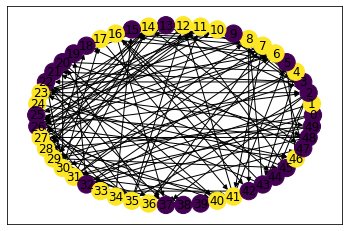

In [132]:
fig, axes = plt.subplots()
nx.draw_networkx(G, pos=lay, arrows=True, node_color=opinion, ax=axes)

In [ ]:
for i in range(4):
    nx.draw_networkx(graphs[i], ax=ax[i])
    ax[i].set_axis_off()

plt.show()

In [123]:
node_list = []
tie_list = []
for agent in population:
    node_list.append(agent.node_output())
    tie_list.extend(agent.tie_output())
    
G = nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(tie_list)

opinion = []
for node in G.nodes:
    opinion.append(G.nodes[node]['opinion'])

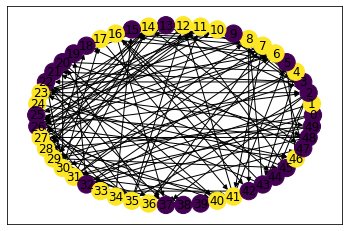

In [128]:
nx.draw_networkx(G, pos=lay, arrows=True, node_color=opinion)

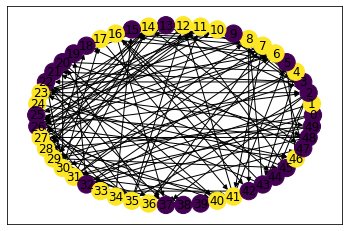

In [124]:
nx.draw_networkx(G, pos=lay, arrows=True, node_color=opinion)

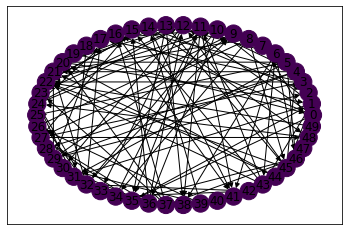

In [109]:
nx.draw_networkx(G, pos=lay, arrows=True, node_color=opinion)

In [114]:
lay = nx.circular_layout(G)

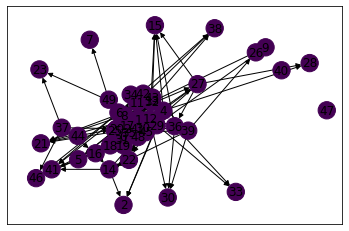

In [108]:
nx.draw_networkx(G, arrows=True, node_color=opinion)

In [ ]:
class Agent():
    
    def __init__(self, opinion=0, change=False, convince=1):
        
        self.opinion=opinion
        self.change=change    
        self.convince=convince
        
        self.friends=[]
        self.node_id=None
        
        self.opinion_history = []
        
    def contact():
        n_contact = rand.randint(0,len(self.friends))
        to_contact = rand.choices(self.friends, k=n_contact)
        for friend in to_contact:
            if friend.opinion != self.opinion:
                if friend.change:
                    if self.convince >= rand.random():
                        friend
    
    def change_opinion_friends(self, threshold=.5):
        opinions = []
        for friend in self.friends:
            opinions.append(friend.opinion)
        if np.mean(opinions) >= threshold:
            self.next_opinion = 1
        else:
            self.next_opinion = 0
            
    def update_opinion(self):
        if self.next_opinion != self.opinion:
            self.opinion=self.next_opinion
            
        self.opinion_history.append(self.opinion)        
        self.next_opinion=None
        
    
    def node_output(self):
        return (
            self.node_id,
            dict(
                opinion=self.opinion,
                frequency=self.frequency,
                status=self.status,
            )          
        )
    
    def tie_output(self):
        tie_list = []
        for friend in self.friends:
            tie_list.append((
                self.node_id,
                friend.node_id
            ))
            
        return tie_list